* A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
* The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
#Load Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80

In [2]:
#Load train and test files 
data = pd.read_csv('../input/black-friday/train.csv')
test = pd.read_csv('../input/black-friday/test.csv')

Step 1 : Explore train and test datasets

In [3]:
#First look at train
data.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
461980,1005112,P00184242,M,36-45,13,B,1,0,9,15.0,NaN,9058
194876,1000057,P00355742,M,18-25,19,C,2,0,3,4.0,NaN,2797
239047,1000891,P00049642,M,26-35,1,C,4+,0,8,14.0,NaN,9789
352109,1000216,P00271442,M,46-50,13,B,1,0,18,NaN,NaN,3084
187660,1004964,P00349442,M,36-45,0,A,1,1,6,8.0,NaN,16099


In [4]:
#First look at test
test.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
110004,1001354,P0096842,F,26-35,2,B,3,0,3,4.0,12.0
144646,1000566,P00165442,M,26-35,17,A,3,0,1,15.0,16.0
74433,1000556,P00000142,F,26-35,9,B,4+,0,3,4.0,5.0
125853,1001925,P00315442,M,51-55,7,B,1,0,1,NaN,NaN
175034,1005720,P00266542,M,26-35,0,A,0,0,2,16.0,NaN


In [5]:
#Shape of train and test
print('There are {} rows and {} columns in train'.format(data.shape[0],data.shape[1]))
print('There are {} rows and {} columns in train'.format(test.shape[0],test.shape[1]))

There are 550068 rows and 12 columns in train
There are 233599 rows and 11 columns in train


In [6]:
#Check Missing values in train
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
#Check Missing values in test
test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Product_Category_2 & Product_Category_3 have many missing vaules in train & test

In [8]:
#Check data types in train
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
#Check data types in test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [10]:
#Lets describe train
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
#Lets describe test
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [12]:
#Lets concatenate train & test
df=pd.concat([data,test])
df.shape 

(783667, 12)

Step 2 : Data cleaning 

In [13]:
#Explore numerical variable - Stay_In_Current_City_Years
df.Stay_In_Current_City_Years.value_counts()
#Total 5 unique vaues

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [14]:
#Lets remove '+' symbol and convert to object
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x: x.replace('+', '')
                                if isinstance(x, str) else x).astype(int)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('object')
df.Stay_In_Current_City_Years.value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

Variable "Stay_In_Current_City_Years" cleaned

Step 3 : Exploratory Data Analysis (EDA)

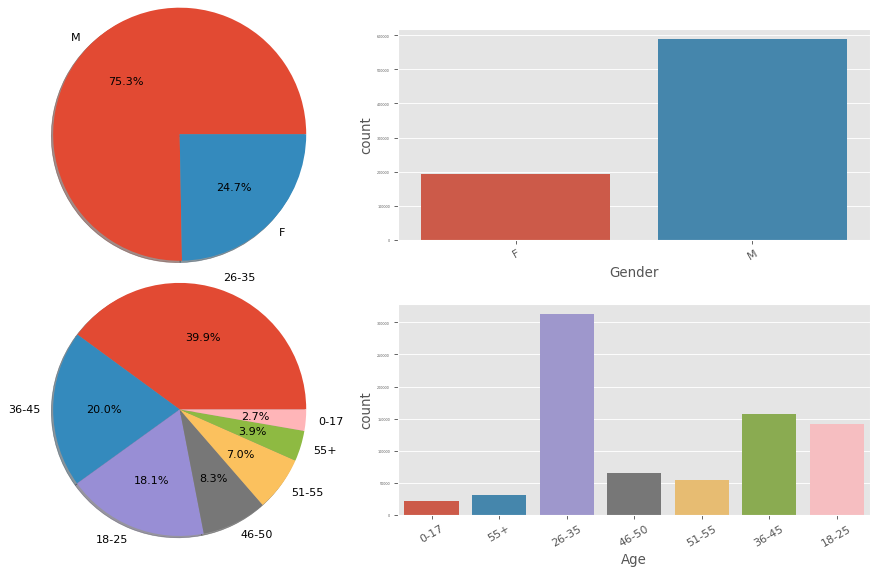

In [15]:
#Explore categorical variables - Gender & Age
cat_col_1 = [
 'Gender',
 'Age',
 ]
count = 1
for cols in cat_col_1:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.5,textprops={'fontsize': 10} )
    count +=1
    plt.subplot(2, 2, count)
    plt.tight_layout()
    sns.countplot(cols, data=df)
    fig=plt.gcf()
    fig.set_size_inches(12,7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=3)
    plt.xticks(rotation=30)
    count+=1

* Gender : 75.3% is male Vs 24.7% female
* Age    : Maximum buyers(39.9%) belong to age group 26-35 and minimum (2.7%) belong to 0-17 age group 

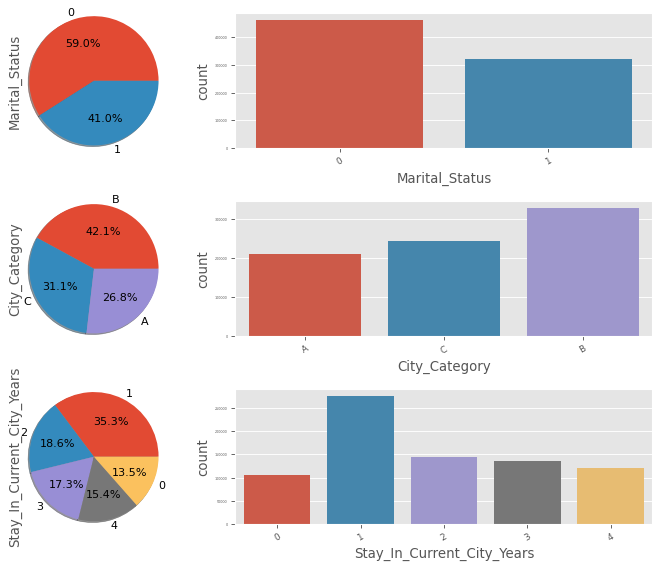

In [16]:
#Explore categorical variables - Marital_Status, City_Category & Stay_In_Current_City_Years
cat_col_2 = [
 'Marital_Status',
 'City_Category',
 'Stay_In_Current_City_Years',
 ]
count = 1
for cols in cat_col_2:
    plt.subplot(3, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.2,textprops={'fontsize': 10} )
    count +=1
    plt.subplot(3, 2, count)
    plt.tight_layout()
    sns.countplot(cols, data=df)
    fig=plt.gcf()
    fig.set_size_inches(10,7)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=3)
    plt.xticks(rotation=30)
    count+=1 

* Marital_status : 59% Not married Vs 41% married
* City_Category  : Maximum buyers belong to City_Category=B (42.1%) and min to City_Category=A (26.8%)
* Stay_In_Current_City_Years : Maximum buyers have stayed in city for 1 year and minimum buyers for 0 years (i.e. recently moved)

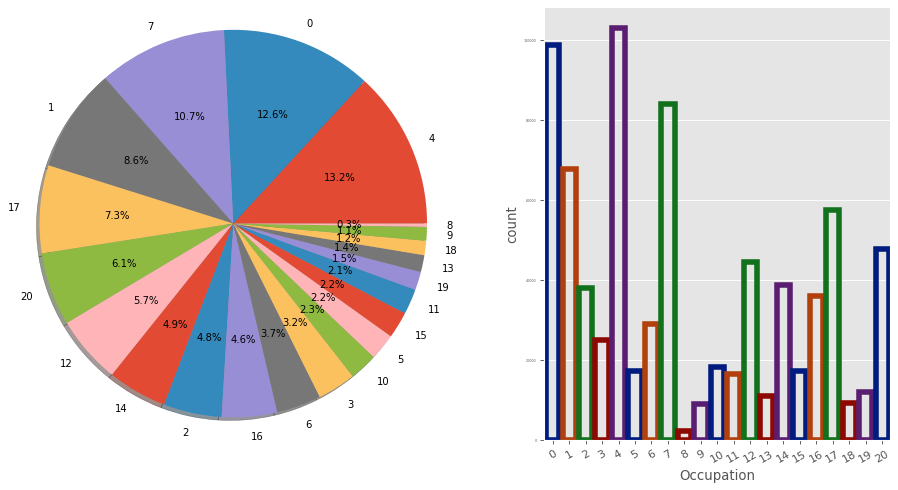

In [17]:
#Explore categorical variable - Occupation
cat_col_3 = ['Occupation',]
count = 1
for cols in cat_col_3:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.4,textprops={'fontsize': 9} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    #df.Occupation.value_counts().sort_values().plot(kind = 'bar')
    sns.countplot(x="Occupation", data=df,facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 5))
    fig=plt.gcf()
    fig.set_size_inches(12,7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=3)
    plt.xticks(rotation=30)
    count+=1

Occupation : Maximum buyers belong to Occupation category = 4 and minimum buyers belong to category = 8

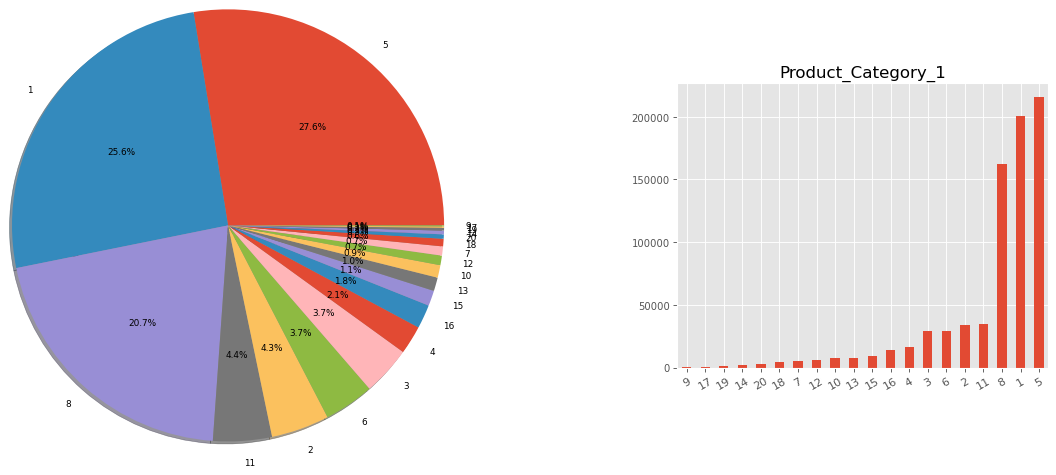

In [18]:
#Explore categorical variable - Product_Category_1
cat_col_4 = ['Product_Category_1',]
count = 1
for cols in cat_col_4:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.9,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('ggplot')
    df.Product_Category_1.value_counts().sort_values().plot(kind = 'bar')
    fig=plt.gcf()
    plt.title("Product_Category_1", fontsize=15) 
    fig.set_size_inches(15,7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

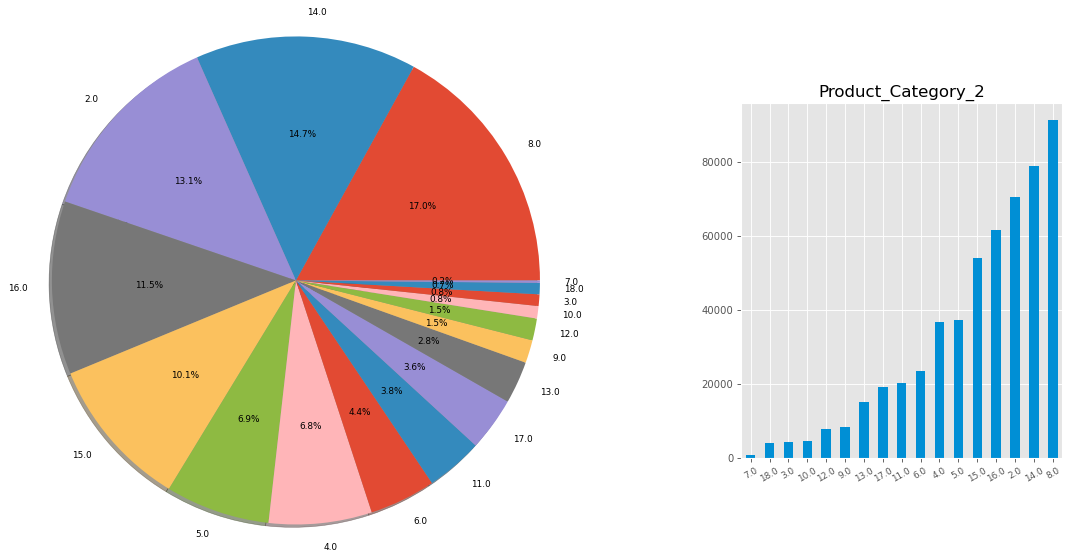

In [19]:
#Explore categorical variable - Product_Category_2
cat_col_5 = ['Product_Category_2',]
count = 1
for cols in cat_col_5:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.9,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    df.Product_Category_2.value_counts().sort_values().plot(kind = 'bar')
    fig=plt.gcf()
    plt.title("Product_Category_2", fontsize=15) 
    fig.set_size_inches(15,10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

For Product_Category_2 : eight is highest and 7.0 is lowest

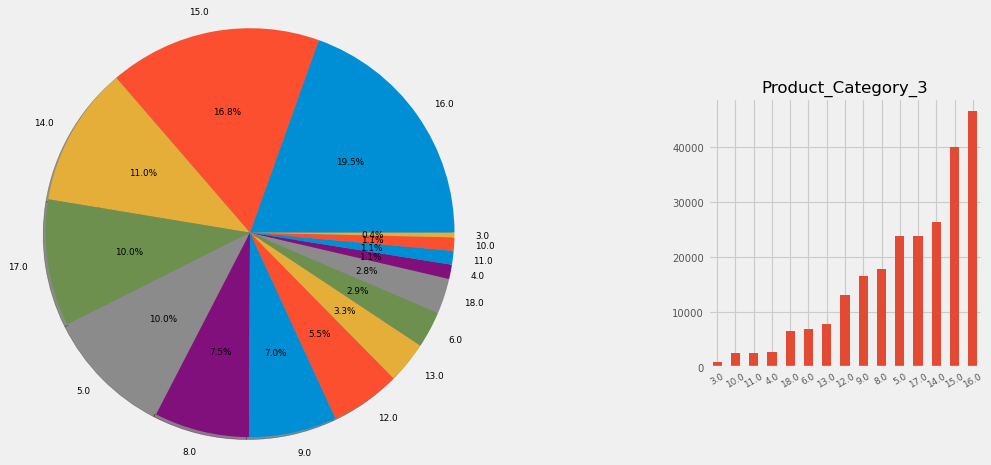

In [20]:
#Explore categorical variable - Product_Category_3
cat_col_6 = ['Product_Category_3',]
count = 1
for cols in cat_col_6:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.9,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('ggplot')
    df.Product_Category_3.value_counts().sort_values().plot(kind = 'bar')
    fig=plt.gcf()
    plt.title("Product_Category_3", fontsize=15) 
    fig.set_size_inches(15,10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

For Product_Category_3 16.0  is max Vs 3.0 is min

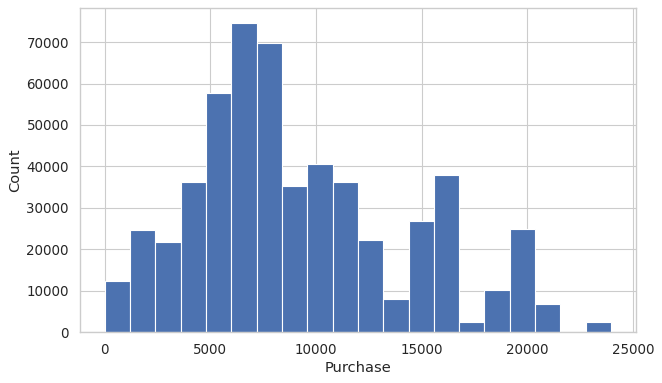

In [21]:
#Lets explore numerical variables - User_ID , Product_ID & Purchase
# Lets see how Purchase analysis looks like
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Purchase'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Purchase', ylabel='Count');

* Maximum frequency (>50k times)can be seen betwee Purchase value (5000-8600)
* Few amounts as high as 23961 is also seen
* Min value is 12

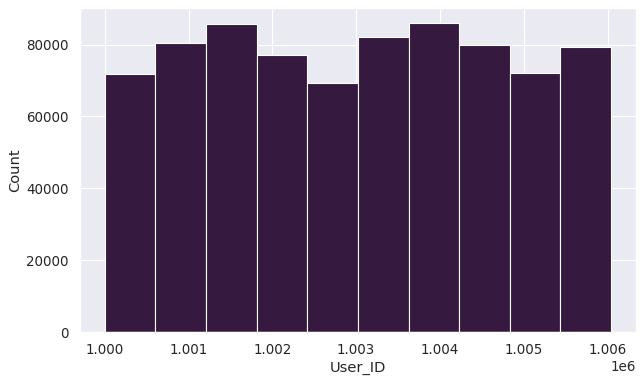

In [22]:
# Lets see how User_ID analysis looks like
sns.set(style='darkgrid', palette="rocket", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['User_ID'], norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
).set(xlabel='User_ID', ylabel='Count');

Frequency distribution looks almost similar for all types of users

In [23]:
#variables - Product_ID 
#Lets emove P and convert product id to a integer
df['Product_ID'] = df['Product_ID'].apply(lambda x: x.replace('P', '')
                                if isinstance(x, str) else x).astype(int)

df['Product_ID'] = df['Product_ID'].astype('int')

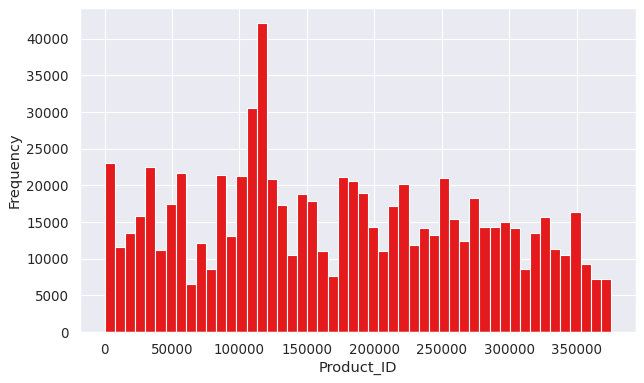

In [24]:
# Lets see how Product_ID analysis looks like
sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Product_ID'], norm_hist=False, kde=False, bins=50, hist_kws={"alpha": 1}
).set(xlabel='Product_ID', ylabel='Frequency');

Maximum frequency of product id can be seen from 110000 to 120000

Lets see relationship between categorical and numerical variables

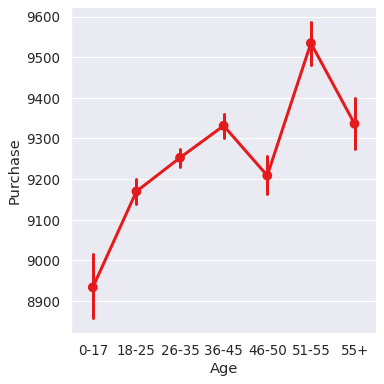

In [25]:
#Variable - Age Vs Purchase
#Catplot Age+Purchase
sns.catplot(x='Age',y='Purchase',kind='point',data=df, order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],)

* Age group 51-55 is the highest purchase group with value 9520+ as median
* Age group 0-17 is the lowest purchase group with value 8920+ as median as they are non-adults and need to depend upon parents for buying 

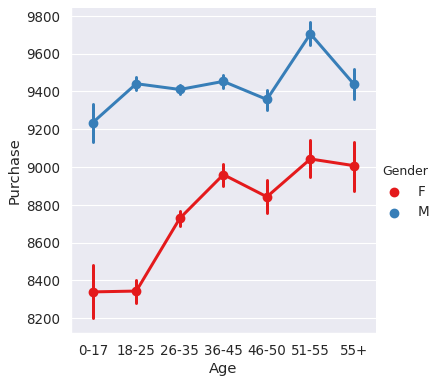

In [26]:
#Variable - Age Vs Purchase with hue = Gender
#Catplot Age+Purchase
sns.catplot(x='Age',y='Purchase',kind='point',data=df, order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],hue='Gender')

* Male have higher buying than female across all age categories
* 51-55 age group is highest in bothh Genders

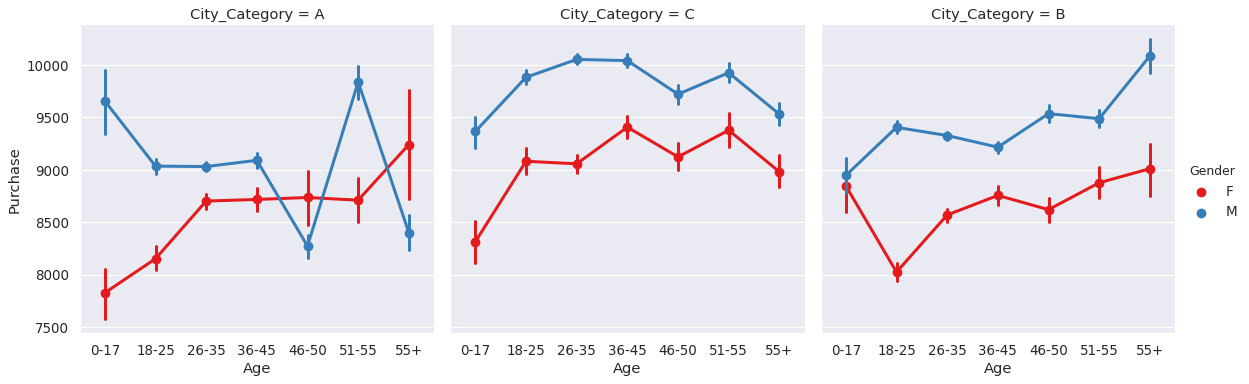

In [27]:
#Catplot Age+Purchase+City_Category+Gender
sns.catplot(x='Age',y='Purchase',kind='point',data=df,col='City_Category',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'])

* In City category B & C : Probabiity of purchases is more for male Gender Vs Female
* For City category A : For age group 45-50 & 55+, female buyers are more than male buyers, for other age groups male are more than female
* In City category B : Probabiity of purchases is more for age group 0-17 than 18-25, 26-35, 36-45 & 46-50 which is interesting

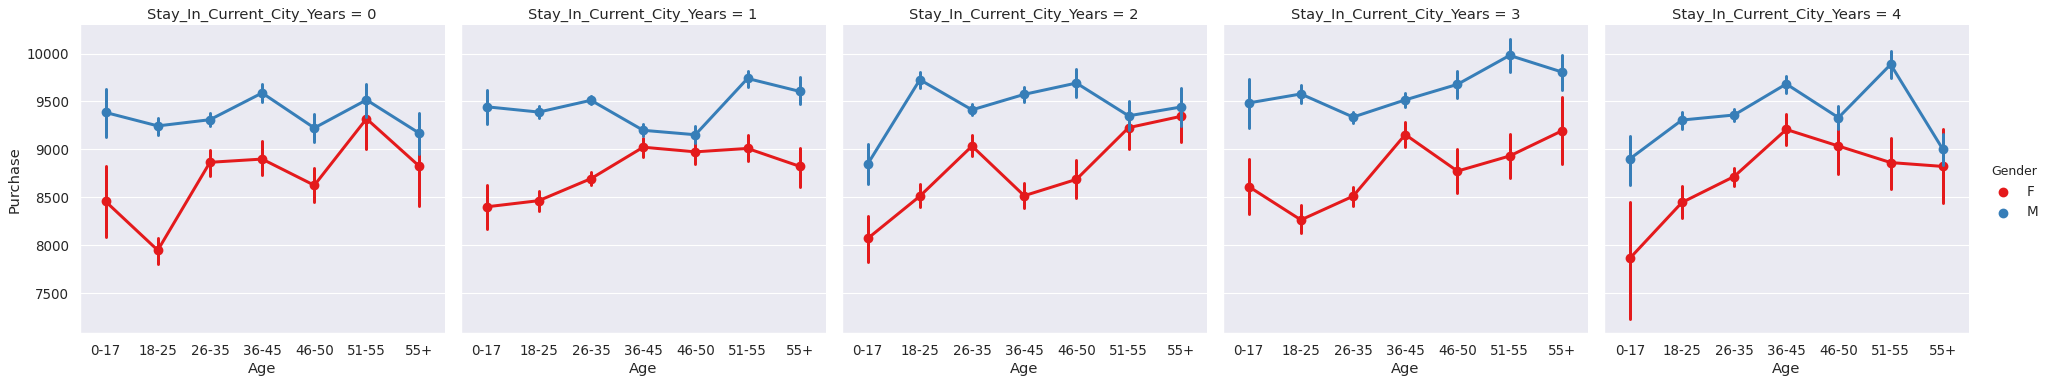

In [28]:
#Catplot Age+Purchase+Stay_In_Current_City_Years+Gender
sns.catplot(x='Age',y='Purchase',kind='point',data=df,col='Stay_In_Current_City_Years',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'])

Irrespective of stay in current city, male purchasing is more than female

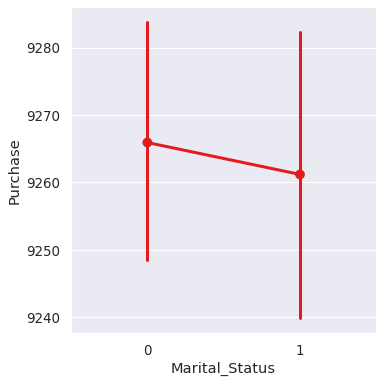

In [29]:
#Catplot Marital_Status+Purchase
sns.catplot(x='Marital_Status',y='Purchase',kind='point',data=df)

Unmarried people buy more than married people 

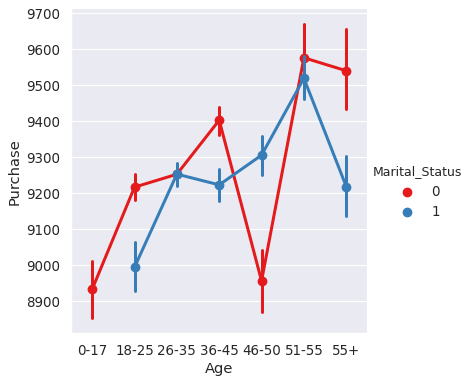

In [30]:
#Catplot Age+Purchase+Marital_Status
sns.catplot(x='Age',y='Purchase',kind='point',data=df,hue='Marital_Status', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'])

* age group 46-50 and married spent more than non-married
* In all other age groups , unmarried people spent more than married

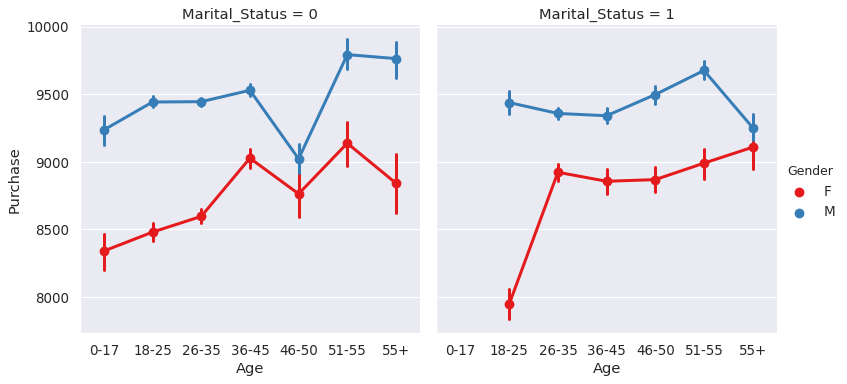

In [31]:
#Catplot Age+Purchase+Marital_Status+Gender
sns.catplot(x='Age',y='Purchase',kind='point',data=df,col='Marital_Status',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'])

* Irrespective of marital status, male purchasing is more than female across all age groups
* age group 0-17 is not married because of obvious reasons

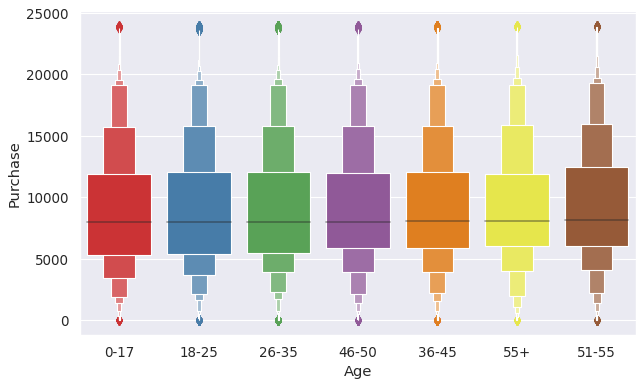

In [32]:
# Boxplot of Age Vs Purchase in ascending order of purchase
sorted_nb = df.groupby(['Age'])['Purchase'].median().sort_values()
sns.boxenplot(x=df['Age'], y=df['Purchase'], order=list(sorted_nb.index))

we can see again that 51-55 is having highest mean of the Purchase amount and is the highest spender

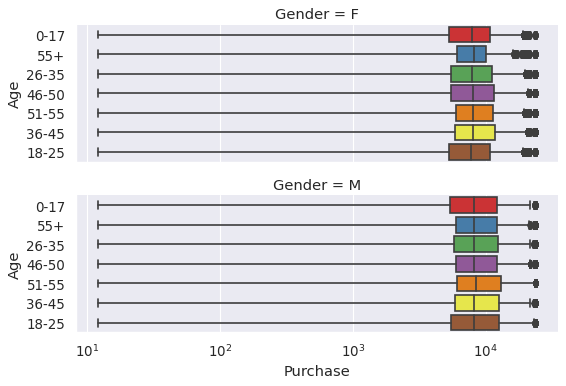

In [33]:
# Boxplot of Age Vs Purchase in horizontal orientation across Gender
g = sns.catplot(x="Purchase", y="Age", row="Gender",
                kind="box", orient="h", height=2.5, aspect=3,
                data=df)
g.set(xscale="log")

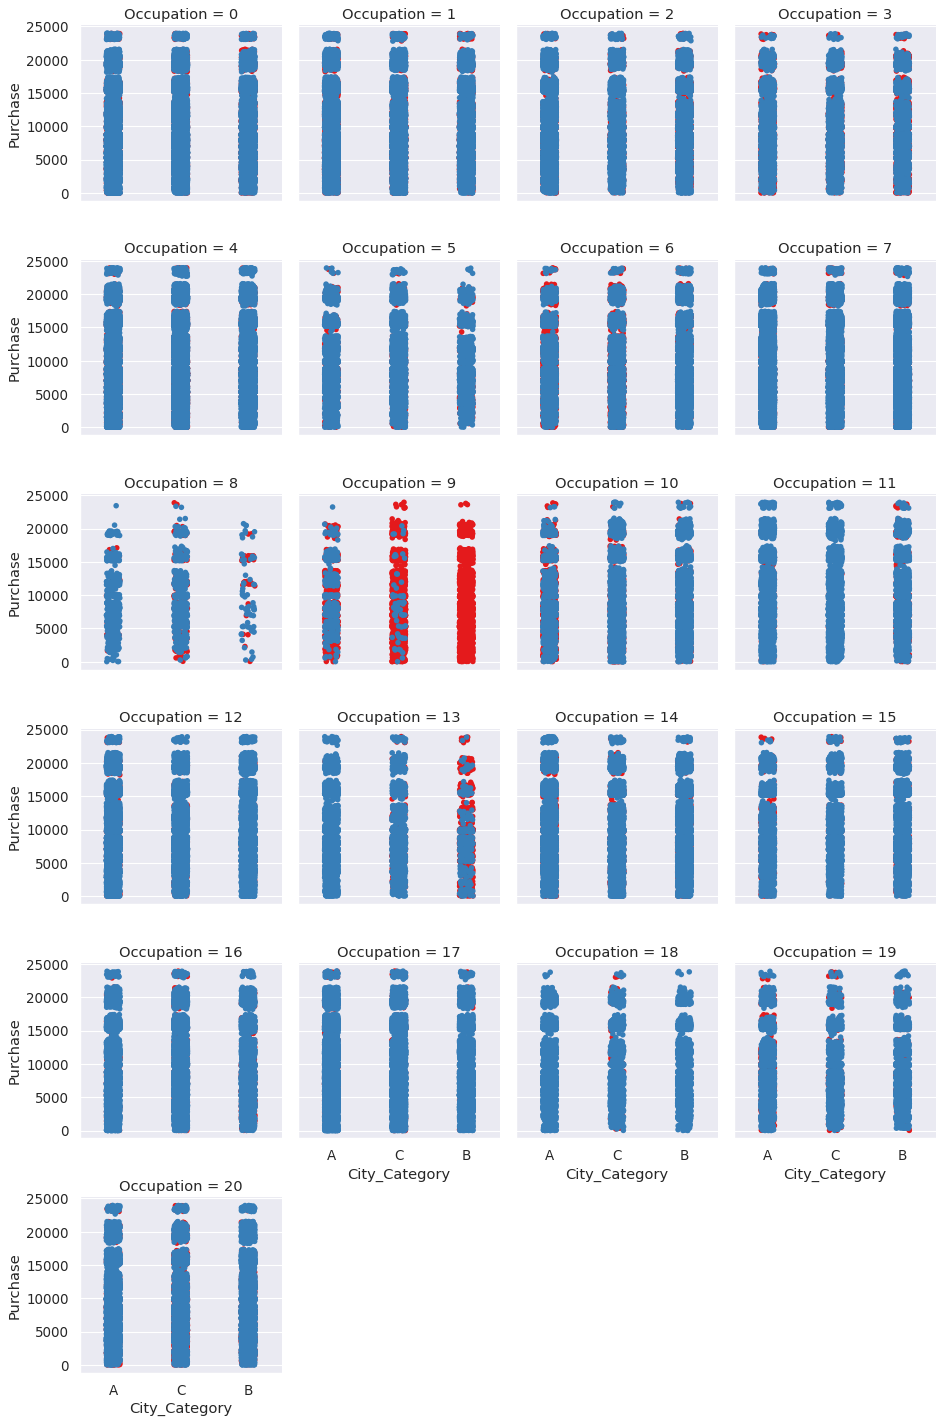

In [34]:
#Facetgrid for Occupation  + Purchase + City_Category  & hue = Gender
cond_plot = sns.FacetGrid(data=df, col='Occupation', hue='Gender', col_wrap=4)
cond_plot.map(sns.stripplot, 'City_Category', 'Purchase');

* For Occupation=9 and city category = B, only female buyers are present
* For Occupation=9 and city category = C, female buyers have very good presence

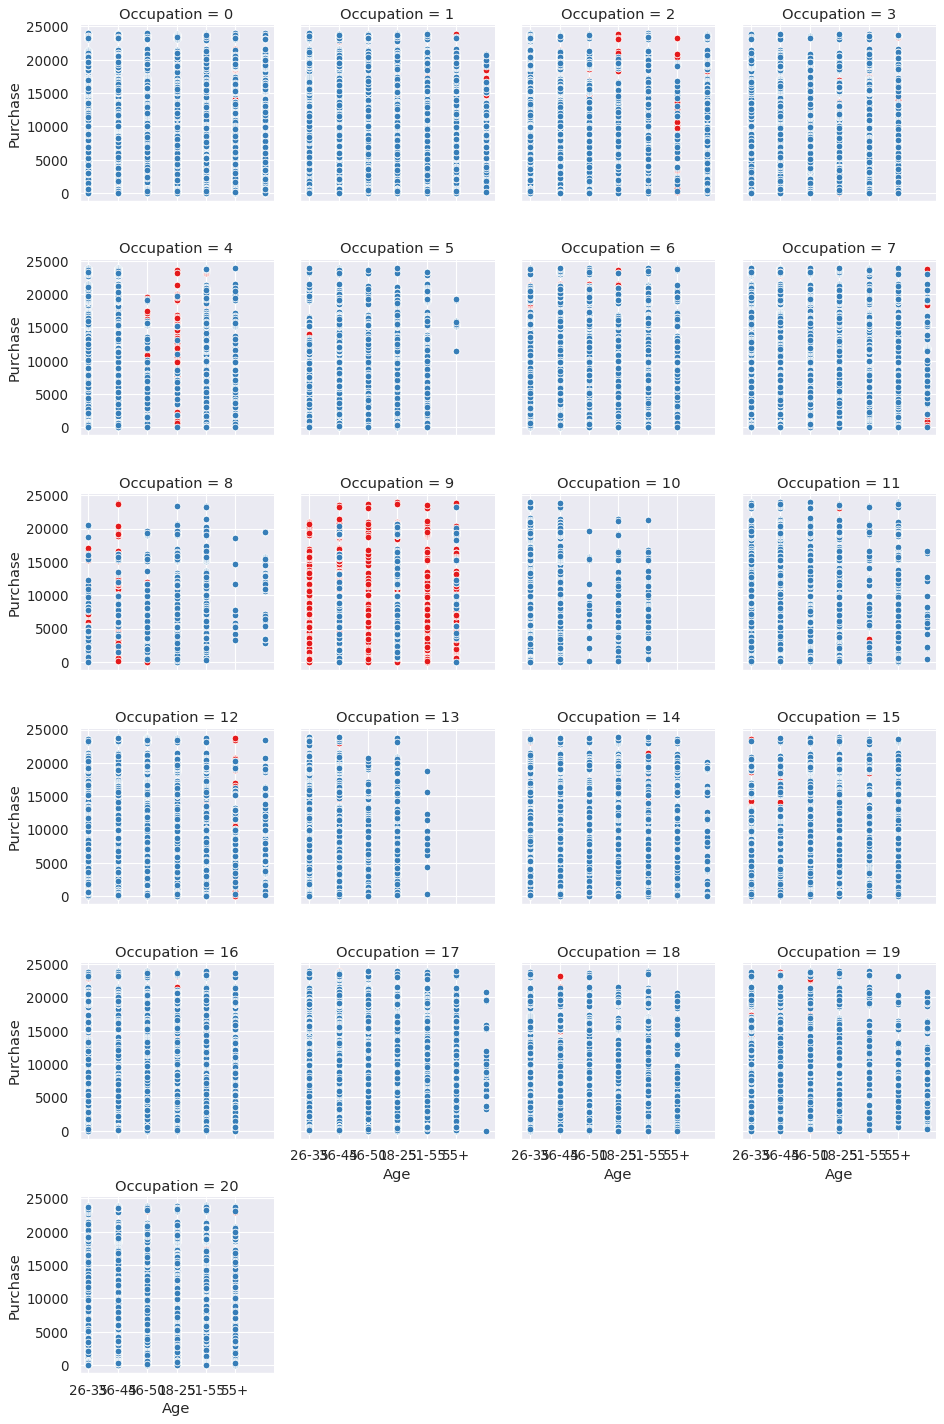

In [35]:
#Facetgrid for Occupation  + Purchase + City_Category  & hue = Gender
cond_plot = sns.FacetGrid(data=df, col='Occupation', hue='Gender', col_wrap=4)
cond_plot.map(sns.scatterplot, 'Age', 'Purchase');

In [36]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
448144,1003038,128942,F,36-45,2,A,1,1,1,11.0,NaN,19399.0
308649,1005556,188542,M,46-50,6,A,0,0,5,8.0,14.0,5228.0
123478,1001090,113242,M,26-35,7,C,1,1,1,6.0,8.0,15655.0
138442,1003108,129542,M,51-55,6,B,1,1,8,14.0,NaN,NaN
107587,1003727,147742,M,36-45,7,B,1,0,1,16.0,NaN,NaN


In [37]:
'''#Impute mode into Product_Category_2 & Product_Category_3
df['Product_Category_2'].fillna(df['Product_Category_2'].value_counts().index[0], inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].value_counts().index[0], inplace=True)
#df.isna().sum()'''

# fill the missing data
df['Product_Category_2'].fillna(method='bfill', inplace=True)
df['Product_Category_3'].fillna(method='bfill', inplace=True)

In [38]:
df['Product_Category_2'].fillna(df['Product_Category_2'].value_counts().index[0], inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].value_counts().index[0], inplace=True)

In [39]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

All missing values are imputed 

In [40]:
#Convert Product_Category_1, Product_Category_2 & Product_Category_3 from object to numerical int
df['Product_Category_1']  = df['Product_Category_1'].astype('int')
df['Product_Category_2']  = df['Product_Category_2'].astype('int')
df['Product_Category_3']  = df['Product_Category_3'].astype('int')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  int64  
 10  Product_Category_3          783667 non-null  int64  
 11  Purchase                    550068 non-null  float64
dtypes: float64(1), int64(7), object(4)
memory usage: 97.7+ MB


In [42]:
#Creating train and test set
df_backup = df.copy()

In [43]:
#Shape of train and test
print('There are {} rows and {} columns in train'.format(df.shape[0],df.shape[1]))

There are 783667 rows and 12 columns in train


In [44]:
#Final Look at data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,F,0-17,10,A,2,0,3,6,14,8370.0
1,1000001,248942,F,0-17,10,A,2,0,1,6,14,15200.0
2,1000001,87842,F,0-17,10,A,2,0,12,14,17,1422.0
3,1000001,85442,F,0-17,10,A,2,0,12,14,17,1057.0
4,1000002,285442,M,55+,16,C,4,0,8,2,17,7969.0


In [45]:
#Converting categorocal variables to dummy variables 
df=pd.get_dummies(df,drop_first=True)

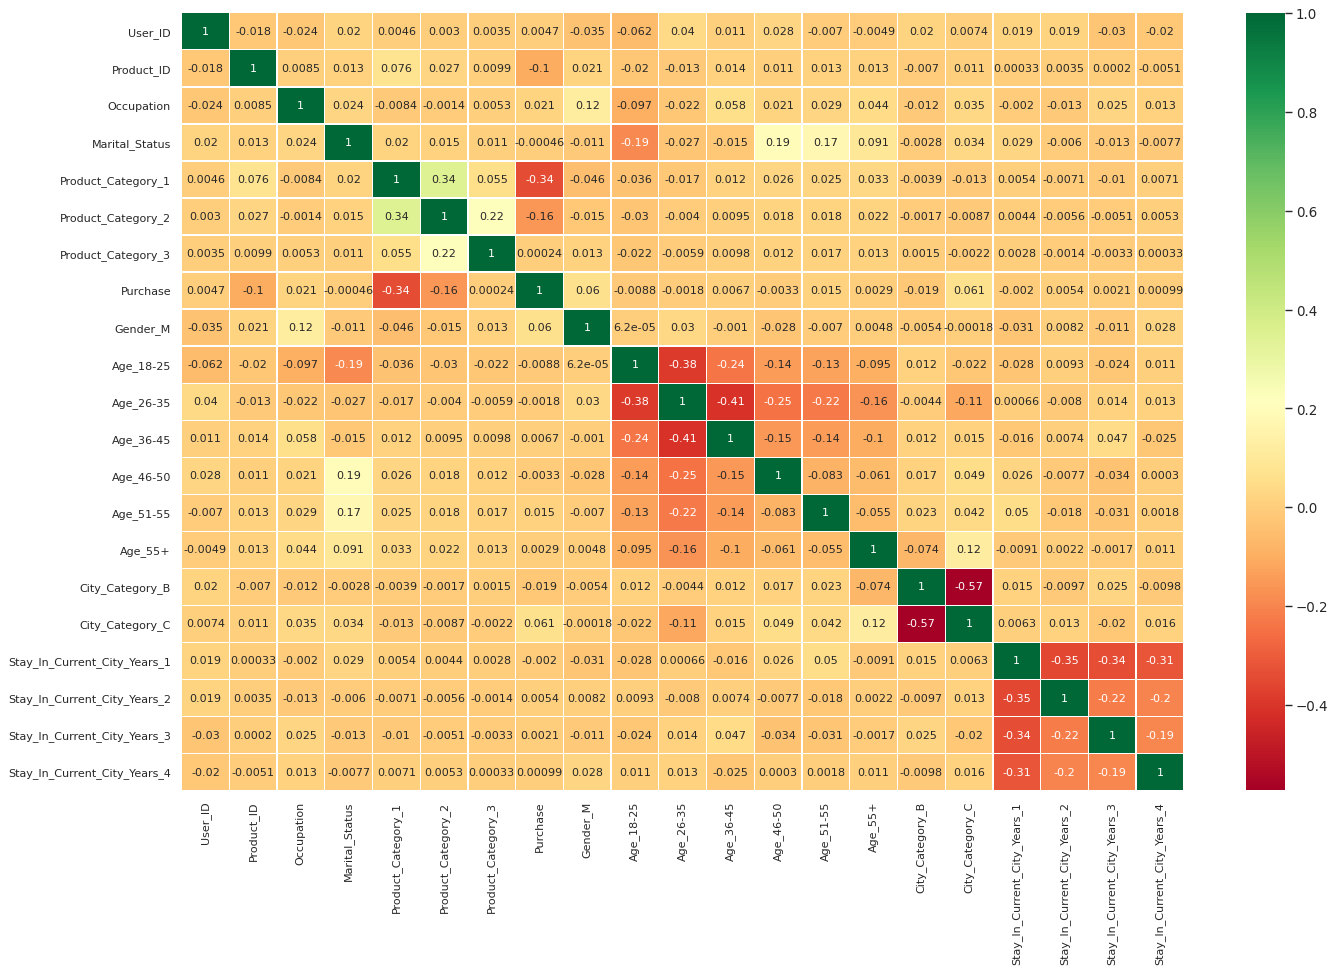

In [46]:
#Lets do a correlation plot for entire dataframe
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(18,12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

We can see negative correlation of Purchase with product category 1

In [47]:
# Segregating train and test from df
train=df[:data.shape[0]]
test1=df[data.shape[0]:]

In [48]:
#Shape of train and test
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test1.shape[0],test1.shape[1]))

There are 550068 rows and 21 columns in train
There are 233599 rows and 21 columns in test


In [49]:
train.head(5)

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,...,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,69042,10,0,3,6,14,8370.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000001,248942,10,0,1,6,14,15200.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000001,87842,10,0,12,14,17,1422.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1000001,85442,10,0,12,14,17,1057.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1000002,285442,16,0,8,2,17,7969.0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [50]:
test1.head(5)

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,...,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000004,128942,7,1,1,11,12,NaN,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1000009,113442,17,0,3,5,12,NaN,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1000010,288442,1,1,5,14,12,NaN,0,0,...,1,0,0,0,1,0,0,0,0,1
3,1000010,145342,1,1,4,9,12,NaN,0,0,...,1,0,0,0,1,0,0,0,0,1
4,1000011,53842,1,0,4,5,12,NaN,0,0,...,0,0,0,0,0,1,1,0,0,0


Drop target column(Purchase) from train and test

In [51]:
train.drop('Purchase', axis = 1, inplace = True)
test1.drop('Purchase', axis = 1, inplace = True)

Train and Test split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.values, data['Purchase'].values, test_size = 0.3, random_state = 4)

In [53]:
#### Scale input values ####
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test)
test1_sc = sc_x.transform(test1)

Model Building starts

We will use XGB Regressor to predict Puchase prices 

Approx Run time : 23 mins

In [54]:
#XGBoost Regressor
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor(n_estimators=3600, learning_rate=0.05)

# Train the model using the training sets 
reg.fit(X_train, y_train,early_stopping_rounds=5,eval_set=[(X_test, y_test)], verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3600, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [56]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
RMSE_xgb=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

R^2: 0.7482354805327578
Adjusted R^2: 0.7482049636213073
MAE: 1866.0668272384646
MSE: 6376408.725278056
RMSE: 2525.1551883553725


> **We got RMSE value of 2525.15 with XGB**

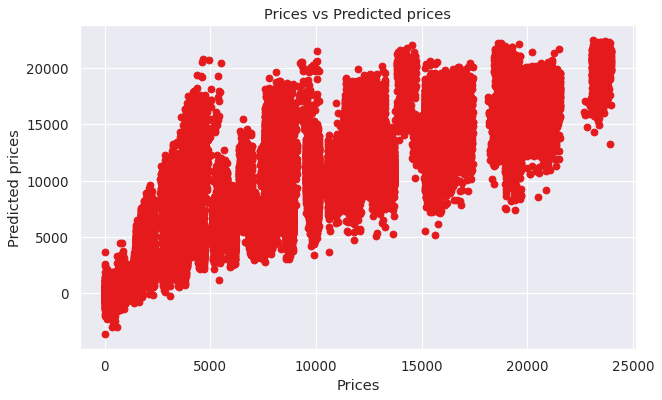

In [57]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

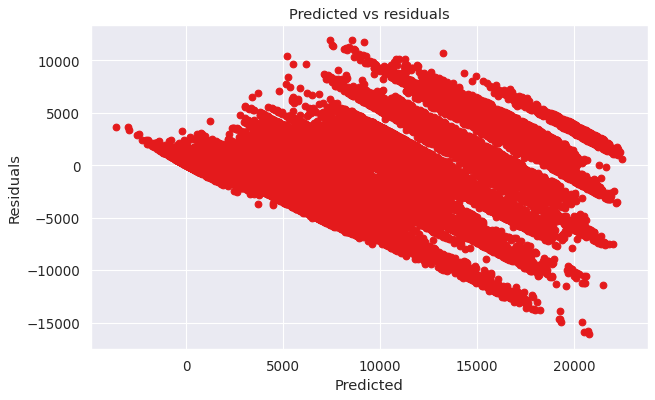

In [58]:
# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Prepare submission file

In [59]:
#Predict on final test data set
predicted_prices = reg.predict(test1_sc)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[15600.5625 11150.929   6273.107  ...  8925.06   18229.098   2026.3928]


In [60]:
#Prepare submission file
my_submission = pd.DataFrame({'Purchase': predicted_prices, 'User_ID': test.User_ID,'Product_ID': test.Product_ID })
# you could use any filename. We choose submission here
my_submission.to_csv('./submission_rahulpednekar.csv', index=False)


> **Please upVote if you have liked my Kernel **